In [68]:
import utils.dataset as dataset
import utils.helpers as helpers
import implementations

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [70]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

Loading data ..
Load done ..


In [71]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

In [72]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.90

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train, 10)

# adding bias to X_train data
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
helpers.set_validation_dataset(X_validation, Y_validation)

print("Preprocess done ..")

Preprocessing train data ..
Preprocess done ..


In [73]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test, 10)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

Preprocessing test data ..
Preprocess done ..


In [74]:
### delete

In [75]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [76]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [77]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [127]:
# put function to helpers
def plot_train_test(train_errors, test_errors, test_range, method_name, testparam):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(test_range, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(test_range, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel(testparam)
    plt.ylabel("root mean squared error")
    plt.title(""+method_name+" - "+testparam+" testing")
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig(method_name+"_"+testparam+"_testing")

In [79]:
# defines initial w of size of features
_features = X_train.shape[1]
w_initial = np.zeros((_features), dtype=int)

In [91]:
# method_name   = algorithm
# params        = specific parameters for method
# test_range    = range from to of to_test_param
# to_test_param = the parameter we want to test in the range of test_range
def regression_gamma_testing(y, x, ratio, seed, test_range, method_name, params, to_test_param):
    # define parameter
    test_range = test_range
    
    # split data into test and train
    x_tr, x_te, y_tr, y_te = dataset.split_data(x, y, ratio, seed)
    c = 0
    
    # store train and test err
    err_train = []
    err_test = []
    
    training_tr = implementations.Training(method_name, params)
    training_te = implementations.Training(method_name, params)
    
    for ind, new_param in enumerate(test_range):
        training_tr.params[to_test_param] = new_param
        w_tr, mse_tr = training_tr.fit(x_tr, y_tr)
        
        training_te.params[to_test_param] = new_param  
        w_te, mse_te = training_te.fit(x_te, y_te)
                
        err_train.append(mse_tr)
        err_test.append(mse_te)
        c += 1
        print(c, "proportion={p}, gamma={g:.3f}, Training RMSE={tr:.5f}, Testing RMSE={te:.5f}".format(
               p=ratio, g=new_param, tr=err_train[ind], te=err_test[ind]))
    plot_train_test(err_train, err_test, test_range, method_name, to_test_param)

## Linear regression using gradient descent
### hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.17093, Testing RMSE=0.17188
2 proportion=0.9, gamma=0.000, Training RMSE=0.17077, Testing RMSE=0.17169
3 proportion=0.9, gamma=0.000, Training RMSE=0.17052, Testing RMSE=0.17138
4 proportion=0.9, gamma=0.000, Training RMSE=0.17012, Testing RMSE=0.17088
5 proportion=0.9, gamma=0.000, Training RMSE=0.16948, Testing RMSE=0.17010
6 proportion=0.9, gamma=0.000, Training RMSE=0.16848, Testing RMSE=0.16888
7 proportion=0.9, gamma=0.000, Training RMSE=0.16696, Testing RMSE=0.16706
8 proportion=0.9, gamma=0.000, Training RMSE=0.16473, Testing RMSE=0.16446
9 proportion=0.9, gamma=0.001, Training RMSE=0.16163, Testing RMSE=0.16091
10 proportion=0.9, gamma=0.001, Training RMSE=0.15755, Testing RMSE=0.15633
11 proportion=0.9, gamma=0.001, Training RMSE=0.15237, Testing RMSE=0.15050
12 proportion=0.9, gamma=0.002, Training RMSE=0.14579, Testing RMSE=0.14302
13 proportion=0.9, gamma=0.004, Training RMSE=0.13736, Testing RMSE=0.13355
14 proportion=0.9, ga

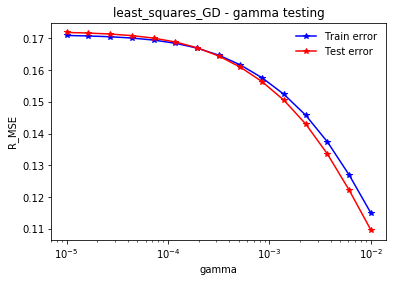

In [102]:
# seed for splitting
seed = 1234
# seed for splitting
split_ratio = ratio_for_splitting
# range of gamma to plot (from, to, iterations)
gamma_range_gd = np.logspace(-5, -2, 15)
# iterations per gamma
iteration_gd = 10
# params for LS-GD
params = {
    'gamma': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_gd ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_gd, "least_squares_GD", params, "gamma")


## Linear regression using stochastic gradient descent
### hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.17083, Testing RMSE=0.17162
2 proportion=0.9, gamma=0.000, Training RMSE=0.17078, Testing RMSE=0.17142
3 proportion=0.9, gamma=0.000, Training RMSE=0.17027, Testing RMSE=0.17094
4 proportion=0.9, gamma=0.000, Training RMSE=0.17006, Testing RMSE=0.17056
5 proportion=0.9, gamma=0.000, Training RMSE=0.16999, Testing RMSE=0.17009
6 proportion=0.9, gamma=0.000, Training RMSE=0.16743, Testing RMSE=0.16850
7 proportion=0.9, gamma=0.000, Training RMSE=0.16493, Testing RMSE=0.16330
8 proportion=0.9, gamma=0.000, Training RMSE=0.16239, Testing RMSE=0.16204
9 proportion=0.9, gamma=0.001, Training RMSE=0.15685, Testing RMSE=0.15924
10 proportion=0.9, gamma=0.001, Training RMSE=0.15178, Testing RMSE=0.15037
11 proportion=0.9, gamma=0.001, Training RMSE=0.14297, Testing RMSE=0.14714
12 proportion=0.9, gamma=0.002, Training RMSE=0.14995, Testing RMSE=0.16710
13 proportion=0.9, gamma=0.004, Training RMSE=0.14299, Testing RMSE=0.27658
14 proportion=0.9, ga

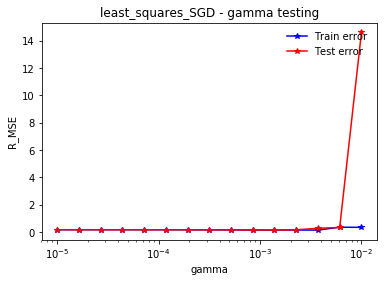

In [97]:
gamma_range_sgd = np.logspace(-5, -2, 15)
# iterations per gamma
iteration_sgd = 10
# params for LS-SGD
params = {
    'initial_w': np.zeros(X_train.shape[1]),
    'batch_size': 100000,
    'max_iters': iteration_sgd,
    'gamma': 0.00005,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_sgd, "least_squares_SGD", params, "gamma")


## Least squares regression using normal equations


In [ ]:
### todo
### todo

## Ridge regression using normal equations
### hyperparameter lambda testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.07609, Testing RMSE=0.07560
2 proportion=0.9, gamma=0.000, Training RMSE=0.07644, Testing RMSE=0.07610
3 proportion=0.9, gamma=0.001, Training RMSE=0.07678, Testing RMSE=0.07651
4 proportion=0.9, gamma=0.002, Training RMSE=0.07723, Testing RMSE=0.07696
5 proportion=0.9, gamma=0.005, Training RMSE=0.07792, Testing RMSE=0.07765
6 proportion=0.9, gamma=0.013, Training RMSE=0.07888, Testing RMSE=0.07871
7 proportion=0.9, gamma=0.034, Training RMSE=0.08033, Testing RMSE=0.08027
8 proportion=0.9, gamma=0.089, Training RMSE=0.08336, Testing RMSE=0.08319
9 proportion=0.9, gamma=0.234, Training RMSE=0.09072, Testing RMSE=0.09036
10 proportion=0.9, gamma=0.616, Training RMSE=0.10606, Testing RMSE=0.10547
11 proportion=0.9, gamma=1.624, Training RMSE=0.12674, Testing RMSE=0.12580
12 proportion=0.9, gamma=4.281, Training RMSE=0.14464, Testing RMSE=0.14346
13 proportion=0.9, gamma=11.288, Training RMSE=0.15662, Testing RMSE=0.15536
14 proportion=0.9, g

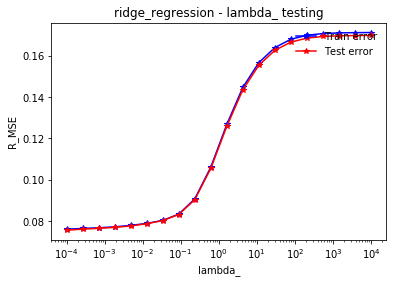

In [115]:
# seed for splitting
seed = 12
# seed for splitting
split_ratio = ratio_for_splitting
# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-4, 4, 20)
params = {
    'lambda_': 0
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, lambdarange, "ridge_regression", params, "lambda_")


## Logistic regression using gradient descent or SGD
### hyperparameter gamma testing

iter 0 loss 0.6931466762331397
Train accuracy 0.6751851851851852
iter 0 loss 0.6931418214931975
Train accuracy 0.6712888888888889
1 proportion=0.9, gamma=0.000, Training RMSE=0.69314, Testing RMSE=0.69314
iter 0 loss 0.69313590307415
Train accuracy 0.6755012345679012
iter 0 loss 0.6931231570475098
Train accuracy 0.6716888888888889
2 proportion=0.9, gamma=0.000, Training RMSE=0.69312, Testing RMSE=0.69311
iter 0 loss 0.6931070126579754
Train accuracy 0.6754962962962963
iter 0 loss 0.6930731193825792
Train accuracy 0.6720444444444444
3 proportion=0.9, gamma=0.000, Training RMSE=0.69307, Testing RMSE=0.69304
iter 0 loss 0.6930295853360083
Train accuracy 0.6755358024691358
iter 0 loss 0.6929391232604877
Train accuracy 0.672
4 proportion=0.9, gamma=0.000, Training RMSE=0.69294, Testing RMSE=0.69286
iter 0 loss 0.6928224232262336
Train accuracy 0.6755851851851852
iter 0 loss 0.692581369646321
Train accuracy 0.6719111111111111
5 proportion=0.9, gamma=0.000, Training RMSE=0.69259, Testing RMSE

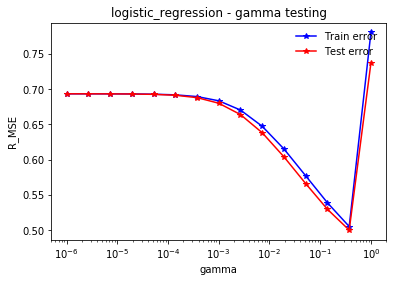

In [122]:
# Gamma testing
gamma_range_reglog_gamma = np.logspace(-6, 0, 15)
iteration_reglog = 10
params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': 0.01 ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_gamma, "logistic_regression", params, "gamma")


## Regularized logistic regression using gradient descent or SGD
### hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.69310, Testing RMSE=0.69304
2 proportion=0.9, gamma=0.000, Training RMSE=0.69295, Testing RMSE=0.69285
3 proportion=0.9, gamma=0.000, Training RMSE=0.69269, Testing RMSE=0.69249
4 proportion=0.9, gamma=0.000, Training RMSE=0.69222, Testing RMSE=0.69185
5 proportion=0.9, gamma=0.000, Training RMSE=0.69136, Testing RMSE=0.69069
6 proportion=0.9, gamma=0.000, Training RMSE=0.68983, Testing RMSE=0.68863
7 proportion=0.9, gamma=0.000, Training RMSE=0.68713, Testing RMSE=0.68506
8 proportion=0.9, gamma=0.001, Training RMSE=0.68254, Testing RMSE=0.67911
9 proportion=0.9, gamma=0.001, Training RMSE=0.67514, Testing RMSE=0.66982
10 proportion=0.9, gamma=0.002, Training RMSE=0.66416, Testing RMSE=0.65657
11 proportion=0.9, gamma=0.004, Training RMSE=0.64940, Testing RMSE=0.63951
12 proportion=0.9, gamma=0.008, Training RMSE=0.63123, Testing RMSE=0.61910
13 proportion=0.9, gamma=0.014, Training RMSE=0.61004, Testing RMSE=0.59594
14 proportion=0.9, ga

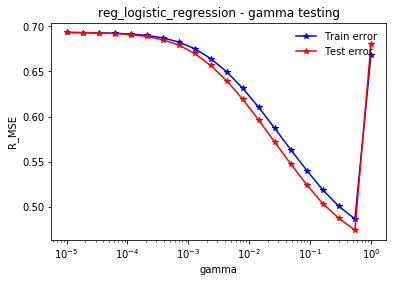

In [125]:
# Gamma testing
gamma_range_reglog_gamma = np.logspace(-5, 0, 20)
iteration_reglog = 10
params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': 0.01 ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_gamma, "reg_logistic_regression", params, "gamma")


### hyperparameter lambda testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.65860, Testing RMSE=0.64076
2 proportion=0.9, gamma=0.000, Training RMSE=0.62720, Testing RMSE=0.61847
3 proportion=0.9, gamma=0.000, Training RMSE=0.60911, Testing RMSE=0.60384
4 proportion=0.9, gamma=0.000, Training RMSE=0.59629, Testing RMSE=0.59302
5 proportion=0.9, gamma=0.000, Training RMSE=0.58649, Testing RMSE=0.58452
6 proportion=0.9, gamma=0.001, Training RMSE=0.57862, Testing RMSE=0.57756
7 proportion=0.9, gamma=0.003, Training RMSE=0.57207, Testing RMSE=0.57169
8 proportion=0.9, gamma=0.011, Training RMSE=0.56648, Testing RMSE=0.56661
9 proportion=0.9, gamma=0.043, Training RMSE=0.56161, Testing RMSE=0.56215
10 proportion=0.9, gamma=0.162, Training RMSE=0.55730, Testing RMSE=0.55817
11 proportion=0.9, gamma=0.616, Training RMSE=0.55344, Testing RMSE=0.55459
12 proportion=0.9, gamma=2.336, Training RMSE=0.54995, Testing RMSE=0.55133
13 proportion=0.9, gamma=8.859, Training RMSE=0.54677, Testing RMSE=0.54838
14 proportion=0.9, ga

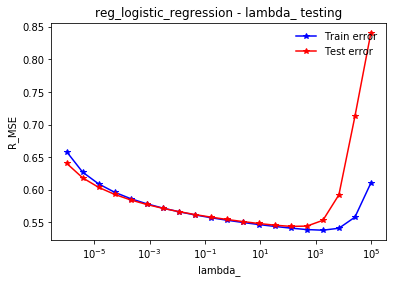

In [126]:
# Lambda testing
gamma_range_reglog_lambda = np.logspace(-6, 5, 20)

params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': 0.01 ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_lambda, "reg_logistic_regression", params, "lambda_")
